In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

# Load the CSV file containing image filenames and defect annotations
train_images_dir = r"C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images"
csv_file = r"C:\Users\Hp\Downloads\severstal-steel-defect-detection\train.csv"
data = pd.read_csv(csv_file)


C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


#### Preprocessing Images: The preprocess_image function loads an image from a given path, resizes it to a specified size, and optionally normalizes its pixel values. The outcome is a preprocessed image in the form of a NumPy array, suitable for use in machine learning models.

In [3]:
## import cv2
import numpy as np

def preprocess_image(image_path, target_size=(120, 120), normalize=True):
    """
    Preprocesses an image: loads, resizes, and normalizes it.

    Parameters:
    - image_path (str): Path to the image file.
    - target_size (tuple): Desired size of the output image (width, height).
    - normalize (bool): Whether to normalize pixel values.

    Returns:
    - Preprocessed image as a numpy array.
    """
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is not None:
        # Resize the image
        image = cv2.resize(image, target_size)

        # Normalize the image
        if normalize:
            image = image / 255.0

        return image
    else:
        return None

In [4]:
# The code iterates over a DataFrame data containing image filenames and their corresponding class IDs. 
# For each image, it constructs the file path, preprocesses the image using the preprocess_image function, 
# and checks if the image was found and processed correctly. Processed images and their class IDs are stored in 
# separate lists (l1 for images, l2 for class IDs). After processing all images, it converts these lists into NumPy arrays 
# (X for images, y for class IDs), which are typically used as input and output for machine learning models. 
# If necessary, additional processing like label encoding of y can be performed after this conversion.

from tqdm import tqdm # tqdm is a library that provides a progress bar for loops.
import os # os is a standard Python library for interacting with the operating system.
l1 = []  # List to store preprocessed images
l2 = []  # List to store corresponding labels

# Loop through each entry in the DataFrame 'data' with a progress bar provided by tqdm.
for img, ClassId, _ in tqdm(data.values):
    # Construct the full file path for the image by joining the directory path and the image filename.
    image_path = os.path.join(train_images_dir, img)
    # Preprocess the image using the earlier defined function which could resize and normalize the image.
    processed_image = preprocess_image(image_path)

     # If the image was found and successfully preprocessed, append it to the list of images (l1).
    # Also, append the corresponding class ID to the list of labels (l2).
    if processed_image is not None:
        l1.append(processed_image)
        l2.append(ClassId)
    else:
        # If the image was not found at the given path, print an error message with the path for debugging.
        print(f"Image not found at path: {image_path}")

# Convert lists to numpy arrays and perform any additional processing (like encoding labels)
X = np.array(l1)
y = np.array(l2)  # Perform label encoding if necessary


  0%|          | 31/7095 [00:00<00:26, 270.64it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0002cc93b.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0007a71bf.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\000a4bcdd.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\000f6bf48.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0014fce06.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0025bde0c.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0025bde0c.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\002af848d.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\002fc4e19.jpg
Image not found at path: C:\Users\Hp\

  1%|          | 59/7095 [00:00<01:05, 108.02it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\01338c0ea.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0139dd004.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0141c9bf3.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0148e9891.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\01540cab1.jpg


  1%|          | 87/7095 [00:00<01:28, 79.12it/s] 

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\026183d85.jpg


  2%|▏         | 120/7095 [00:01<01:43, 67.07it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0405e7c54.jpg


  2%|▏         | 154/7095 [00:02<02:08, 53.94it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\05747b10b.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\060964105.jpg


  2%|▏         | 171/7095 [00:02<01:47, 64.50it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\060c3159e.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\068c6c4a9.jpg


  3%|▎         | 206/7095 [00:02<01:49, 62.89it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\07c3d6d77.jpg


  3%|▎         | 221/7095 [00:03<01:40, 68.55it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\08193cfc8.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0842fa725.jpg


  6%|▌         | 410/7095 [00:04<00:17, 378.30it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0a21ce787.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0a26aceb2.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0a37f0a29.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0a405b396.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0a4ad45a5.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0a5cff3a7.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0a8cb8ddf.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0a9a7a6c7.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\0a9aaba9a.jpg
Image not found at path: C:\Users\Hp\

  8%|▊         | 574/7095 [00:04<00:10, 644.84it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\159a2fee0.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\159b43d49.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\15ab03ce5.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\15aeb5d52.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\15e512a0f.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\15ece0447.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\15f14781f.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\15f8fd390.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\161ca82bf.jpg
Image not found at path: C:\Users\Hp\

  9%|▉         | 637/7095 [00:05<00:28, 225.20it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\17ac2163c.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\18ba753ff.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\18c14f720.jpg


 11%|█         | 765/7095 [00:07<01:07, 93.46it/s] 

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\1bed9264f.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\1c1ca0221.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\1c1ca0221.jpg


 11%|█         | 781/7095 [00:07<01:13, 86.14it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\1c96b0bbc.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\1ccb093e6.jpg


 11%|█▏        | 805/7095 [00:07<01:19, 79.42it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\1d718ddb9.jpg


 12%|█▏        | 824/7095 [00:08<01:24, 73.96it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\1df9eefe5.jpg


 13%|█▎        | 895/7095 [00:09<01:29, 69.65it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\1ffe887dd.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\1ffe887dd.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2012a6d02.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\205685883.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\205685883.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\206c8bb0c.jpg


 13%|█▎        | 923/7095 [00:09<01:17, 79.88it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\20bb27a04.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\214465021.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\215edd511.jpg


 13%|█▎        | 941/7095 [00:09<01:18, 78.79it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\21ac40700.jpg


 14%|█▎        | 974/7095 [00:10<01:22, 74.12it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\22a825813.jpg


 14%|█▍        | 999/7095 [00:10<01:23, 73.10it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\23e4a530a.jpg


 15%|█▍        | 1032/7095 [00:11<01:23, 72.60it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\24e125a16.jpg


 15%|█▌        | 1071/7095 [00:11<01:23, 71.80it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\268446e17.jpg


 16%|█▌        | 1103/7095 [00:12<01:24, 71.01it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2789df930.jpg


 16%|█▌        | 1135/7095 [00:12<01:25, 69.90it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\28a3f7928.jpg


 16%|█▋        | 1154/7095 [00:12<01:21, 73.24it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2959d7fb1.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2969217e8.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2969217e8.jpg


 17%|█▋        | 1187/7095 [00:13<01:16, 77.40it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2a7f8bab0.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2b01fd731.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2b0d476d6.jpg


 21%|██        | 1460/7095 [00:14<00:11, 506.50it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2eeed5102.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2ef5b3de1.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2ef6ad027.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2efdba8cd.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2eff528e8.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2f69f62ae.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2f6b7235e.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2f6c4d0e7.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\2f6fd7d87.jpg
Image not found at path: C:\Users\Hp\

 22%|██▏       | 1578/7095 [00:15<00:07, 695.47it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\35c80b6f0.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\35ce31284.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\35d142883.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\35d142883.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\35fdf5c15.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\36025df84.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\3604dfc38.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\362b4c3d0.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\363e841ad.jpg
Image not found at path: C:\Users\Hp\

 23%|██▎       | 1650/7095 [00:15<00:24, 218.66it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\3df2a0383.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\3df2a0383.jpg


 24%|██▍       | 1703/7095 [00:16<00:36, 146.93it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\3f536622f.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\3fcd061fc.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\3fcd061fc.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\3fe32ff2f.jpg


 25%|██▌       | 1795/7095 [00:17<00:52, 101.40it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\41f3899a5.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\41f5ea1f2.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\41f5ea1f2.jpg


 26%|██▌       | 1814/7095 [00:18<00:57, 91.95it/s] 

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\42dd20db7.jpg


 26%|██▋       | 1864/7095 [00:18<01:02, 83.93it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\44415ab00.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\447038bc8.jpg


 27%|██▋       | 1916/7095 [00:19<01:08, 75.33it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\4613d520c.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\463fe382b.jpg


 28%|██▊       | 1976/7095 [00:20<01:23, 61.55it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\488922ac2.jpg


 29%|██▉       | 2082/7095 [00:22<01:37, 51.60it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\4cca18753.jpg


 30%|██▉       | 2119/7095 [00:23<01:30, 54.80it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\4e1d262fb.jpg


 31%|███       | 2181/7095 [00:24<01:13, 67.28it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\503c4f93a.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\50ac457cb.jpg


 31%|███       | 2198/7095 [00:24<01:07, 72.56it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\50fb57a6c.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\50ff24e6e.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\510b9c5cc.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\514f11c53.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\516b72597.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\51938ecf0.jpg


 36%|███▋      | 2582/7095 [00:24<00:04, 987.14it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\519599df3.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\519e11f0b.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\519e11f0b.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\51a3f4c59.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\51b211df9.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\51c35e519.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\51d092947.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\51d3e5941.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\51d7bdfc2.jpg
Image not found at path: C:\Users\Hp\

 39%|███▉      | 2802/7095 [00:24<00:03, 1318.25it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\60aca03e2.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\60bc48f6b.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\60bdfb21b.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\60d7248a8.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\60d7248a8.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\60d7ee261.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\60efe3f90.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\60f9f7ff2.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\60fb3a793.jpg
Image not found at path: C:\Users\Hp\

 41%|████▏     | 2937/7095 [00:26<00:18, 222.54it/s] 

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\6cb1e08e1.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\6d291e247.jpg


 43%|████▎     | 3034/7095 [00:27<00:27, 150.25it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\6f96a0814.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\6f998a931.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\6fa9e1d65.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\6fa9e1d65.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\6fabaf589.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\6faf833c5.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\6fb878fef.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\6fc6a0964.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\6fcd94e33.jpg
Image not found at path: C:\Users\Hp\

 47%|████▋     | 3322/7095 [00:28<00:13, 288.93it/s]


Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\708c66026.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\7095ad89d.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\7095dc41e.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\709ee2497.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\70a1d1d39.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\70a38928c.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\70a3c6b4d.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\70a644cb3.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\70b0fb0cd.jpg
Image not found at path: C:\Users\Hp

 48%|████▊     | 3428/7095 [00:29<00:16, 217.25it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\7ca2551c2.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\7dcd46899.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\7eb958c89.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\7f3181e44.jpg


 50%|█████     | 3563/7095 [00:31<00:27, 128.09it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\81b6f3cca.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\81b6f3cca.jpg


 52%|█████▏    | 3661/7095 [00:32<00:35, 97.62it/s] 

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\85294cff9.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\85294cff9.jpg


 54%|█████▍    | 3829/7095 [00:34<00:44, 72.75it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\8b6c404ac.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\8b9c035ec.jpg


 54%|█████▍    | 3866/7095 [00:35<00:49, 64.73it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\8cc65d1f7.jpg


 55%|█████▌    | 3931/7095 [00:36<00:52, 60.74it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\8ed6b8054.jpg


 56%|█████▌    | 3956/7095 [00:36<00:44, 70.32it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\8f81e6d35.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\8f81e6d35.jpg


 56%|█████▌    | 3988/7095 [00:37<00:43, 72.05it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9085aef37.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\90f4dd6e5.jpg


 57%|█████▋    | 4036/7095 [00:38<00:43, 70.55it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9271c7e3d.jpg


 57%|█████▋    | 4061/7095 [00:38<00:42, 71.39it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\933675d91.jpg


 58%|█████▊    | 4093/7095 [00:38<00:42, 69.98it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\946525536.jpg


 59%|█████▉    | 4200/7095 [00:40<00:40, 71.37it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\98937deb7.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\98937deb7.jpg


 61%|██████    | 4319/7095 [00:41<00:10, 256.18it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9a8c769b4.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9aa301f3e.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9aa437d47.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9aa721852.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9aa721852.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9ab372c8c.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9ab57a2fa.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9b09b2a38.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9b40d78e0.jpg
Image not found at path: C:\Users\Hp\

 64%|██████▍   | 4545/7095 [00:41<00:03, 802.69it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9dc65bc1e.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9ddbb8f42.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9ddc8a514.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9dfb319cc.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9e009a678.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9e130c0b6.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9e1406b36.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9e1d4b339.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\9e1f9aaaf.jpg
Image not found at path: C:\Users\Hp\

 70%|██████▉   | 4962/7095 [00:41<00:01, 1424.49it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\ac461b596.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\ac47aefbc.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\ac48ab24b.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\ac4ba5c1a.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\ac504079d.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\ac550233a.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\ac59becc1.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\ac5de187a.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\ac6367260.jpg
Image not found at path: C:\Users\Hp\

 72%|███████▏  | 5137/7095 [00:41<00:01, 1380.86it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\b8f684e65.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\b90e286a5.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\b90f74ebe.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\b913b77cc.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\b925ef3b7.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\b93118acc.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\b933f4591.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\b93cc6719.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\b93f5fdc0.jpg
Image not found at path: C:\Users\Hp\

 74%|███████▍  | 5280/7095 [00:43<00:07, 241.10it/s] 

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\bee2f16b2.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\bf5e1ed13.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\bff6cdfad.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\bff6cdfad.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\c0eb3a086.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\c199d741a.jpg


 76%|███████▌  | 5382/7095 [00:44<00:10, 159.54it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\c210d2e08.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\c34bf9bec.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\c35fa49e2.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\c35fa49e2.jpg


 78%|███████▊  | 5510/7095 [00:46<00:13, 115.94it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\c720250a2.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\c75e6bd36.jpg


 78%|███████▊  | 5550/7095 [00:47<00:14, 107.46it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\c7fe435c0.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\c83361e9d.jpg


 79%|███████▉  | 5604/7095 [00:47<00:16, 92.88it/s] 

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\c98404d89.jpg


 79%|███████▉  | 5638/7095 [00:48<00:16, 87.12it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\caf49d870.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\caf49d870.jpg


 80%|████████  | 5699/7095 [00:49<00:19, 73.22it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\ccbeeb18a.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\cd1f8d368.jpg


 81%|████████  | 5717/7095 [00:49<00:18, 76.31it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\cd5b14850.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\cd5b14850.jpg


 81%|████████  | 5733/7095 [00:49<00:20, 67.26it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\cdc267505.jpg


 81%|████████  | 5763/7095 [00:50<00:20, 64.86it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\ce7b7ac0b.jpg


 81%|████████▏ | 5778/7095 [00:50<00:19, 68.15it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\cef5ff47d.jpg


 82%|████████▏ | 5806/7095 [00:50<00:21, 61.25it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d01d3e444.jpg


 82%|████████▏ | 5822/7095 [00:51<00:18, 67.01it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d0d818b7d.jpg


 83%|████████▎ | 5859/7095 [00:51<00:14, 83.22it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d2291de5c.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d2291de5c.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d238605c1.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d26ead1d8.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d26ead1d8.jpg


 83%|████████▎ | 5905/7095 [00:52<00:15, 75.83it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d3ef4bac1.jpg


 85%|████████▍ | 6010/7095 [00:52<00:03, 301.12it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d4aeee4c8.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d4af6d206.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d4c0b4c3b.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d4c8f8461.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d4ce2a21d.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d4da4dc47.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d50164a40.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d51a45df9.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d51ea5c21.jpg
Image not found at path: C:\Users\Hp\

 85%|████████▌ | 6066/7095 [00:53<00:07, 134.03it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d98664198.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\d98664198.jpg


 86%|████████▌ | 6116/7095 [00:53<00:09, 100.49it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\db4867ee8.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\db4867ee8.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\db4867ee8.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\dbac90dc5.jpg


 87%|████████▋ | 6140/7095 [00:53<00:10, 89.37it/s] 

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\dc58fa33b.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\dc636ab48.jpg


 93%|█████████▎| 6592/7095 [00:56<00:00, 822.76it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\e2abceace.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\e2ad8a12a.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\e2b3cf9a4.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\e2bdd4236.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\e2c203a0f.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\e2c4275d6.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\e2d02393b.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\e2d64c010.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\e2d64c010.jpg
Image not found at path: C:\Users\Hp\

 96%|█████████▌| 6808/7095 [00:57<00:00, 310.59it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f1699acad.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f17e982f9.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f1807fbdd.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f183f0192.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f186527ee.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f195eeda7.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f1becb8a5.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f1becb8a5.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f1bf46783.jpg
Image not found at path: C:\Users\Hp\

 97%|█████████▋| 6864/7095 [00:58<00:01, 183.93it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f727d997a.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f7b1dd93a.jpg


 97%|█████████▋| 6906/7095 [00:58<00:01, 143.10it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f9668c7cd.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f9668c7cd.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\f9b337a42.jpg


 98%|█████████▊| 6938/7095 [00:59<00:01, 132.69it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\fa3a68a38.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\fa3a68a38.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\faa0cdf84.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\faa1000af.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\faa73f1d9.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\faa80e2e8.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\faab4b759.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\fab50d91a.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\fac91988f.jpg
Image not found at path: C:\Users\Hp\

100%|█████████▉| 7093/7095 [00:59<00:00, 249.91it/s]

Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\fbbb8f8b2.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\fbbd2ed0d.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\fbc97ac61.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\fbc97ac61.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\fbcb3df55.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\fbd219354.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\fbdc2daae.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\fbdde63d5.jpg
Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\fbf282a60.jpg
Image not found at path: C:\Users\Hp\

100%|██████████| 7095/7095 [00:59<00:00, 119.42it/s]


Image not found at path: C:\Users\Hp\Downloads\severstal-steel-defect-detection\train_images\ffffd67df.jpg


In [5]:
# Convert labels to one-hot encoding
y = to_categorical(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)

# Display shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3058, 120, 120, 3)
X_test shape: (765, 120, 120, 3)
y_train shape: (3058, 5)
y_test shape: (765, 5)


In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load pre-trained ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(120, 120, 3))
base_model.trainable = False  # Freeze base model

# Add custom layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


The code above utilizes transfer learning to create a convolutional neural network (CNN) for image classification. It employs the pre-trained ResNet50 model, initially trained on ImageNet data. The loaded model's weights are frozen to prevent further training on its convolutional layers. Custom layers, including global average pooling, dense layers with ReLU activation, and dropout layers, are added to adapt the network for a specific image classification task. The model is compiled with categorical crossentropy loss, the Adam optimizer, and accuracy as the evaluation metric. Overall, this approach leverages the knowledge encoded in ResNet50's weights for feature extraction, while fine-tuning the added layers for the specific classification requirements.

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation
train_datagen = ImageDataGenerator()  # Adjust parameters for augmentation if needed
train_generator = train_datagen.flow(X_train, y_train, batch_size=128)

# Train the model
history = model.fit(train_generator, epochs=30, validation_data=(X_test, y_test), verbose=1)


Epoch 1/30
24/24 [==============================] - 154s 6s/step - loss: 0.9023 - accuracy: 0.6903 - val_loss: 0.7423 - val_accuracy: 0.7490
Epoch 2/30
24/24 [==============================] - 109s 5s/step - loss: 0.7493 - accuracy: 0.7495 - val_loss: 0.7387 - val_accuracy: 0.7490
Epoch 3/30
24/24 [==============================] - 126s 5s/step - loss: 0.7492 - accuracy: 0.7495 - val_loss: 0.7539 - val_accuracy: 0.7490
Epoch 4/30
24/24 [==============================] - 118s 5s/step - loss: 0.7433 - accuracy: 0.7495 - val_loss: 0.7401 - val_accuracy: 0.7490
Epoch 5/30
24/24 [==============================] - 108s 5s/step - loss: 0.7511 - accuracy: 0.7495 - val_loss: 0.7373 - val_accuracy: 0.7490
Epoch 6/30
24/24 [==============================] - 112s 5s/step - loss: 0.7510 - accuracy: 0.7495 - val_loss: 0.7411 - val_accuracy: 0.7490
Epoch 7/30
24/24 [==============================] - 118s 5s/step - loss: 0.7438 - accuracy: 0.7495 - val_loss: 0.7400 - val_accuracy: 0.7490
Epoch 8/30
24

(<AxesSubplot:title={'center':'Loss curve'}>,)

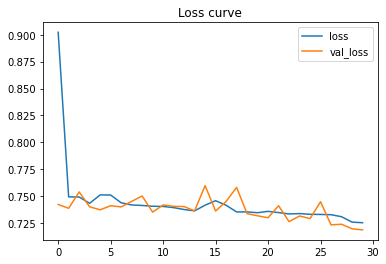

In [8]:
# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Select and plot the training and validation loss over epochs
# 'loss' represents the training loss, and 'val_loss' is the validation loss
# The plot is titled 'Loss curve'
history_df.loc[:, ['loss', 'val_loss']].plot(title='Loss curve')


- The 'Loss curve' graph shows two lines: one for 'loss' (training loss) and one for 'val_loss' (validation loss). These lines plot the loss value as the model trains over a number of epochs (iterations).
- The training loss ('loss') represents the model's error on the training dataset.
- The validation loss ('val_loss') represents the model's error on a dataset that was not used for training (a held-out validation set).
- Ideally, both loss values should decrease over time, indicating that the model is learning and improving its predictions.
- If the validation loss stops decreasing or increases while the training loss continues to decrease, it may be a sign of overfitting—where the model learns the training data too well but does not generalize to new data effectively.

(<AxesSubplot:title={'center':'Accuracy curve'}>,)

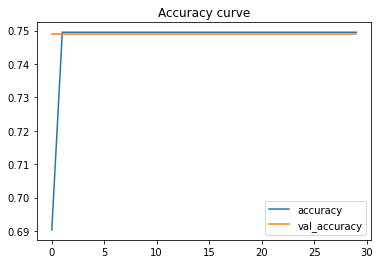

In [9]:
# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Select and plot the training and validation accuracy over epochs
# 'accuracy' represents the training accuracy, and 'val_accuracy' is the validation accuracy
# The plot is titled 'Accuracy curve'
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title='Accuracy curve')


- The 'Accuracy curve' graph similarly plots two lines: 'accuracy' (training accuracy) and 'val_accuracy' (validation accuracy).
- The accuracy metrics represent the proportion of correct predictions in the training and validation datasets, respectively.
- As with loss, you want the accuracy on both training and validation datasets to improve over time.
- The model's final accuracy on the validation set is often considered a more reliable performance measure than training set accuracy because it indicates how well the model can be expected to perform on unseen data.

In [10]:
# Evaluate model performance
result = model.evaluate(X_test, y_test)
print(f"[+] Accuracy: {result[1]*100:.2f}%")

24/24 [==============================] - 27s 1s/step - loss: 0.7186 - accuracy: 0.7490
[+] Accuracy: 74.90%


27s 1s/step: This tells you the total time taken for the evaluation and the average time per step (or batch). Here, the evaluation took 27 seconds in total, with each step taking approximately 1 second.

loss: 0.7186: The 'loss' is a measure of how well the model is performing, with lower values indicating better performance. A loss of 0.7186 suggests that on average, the model's predictions are that amount 'off' from the true values (according to the specific loss function being used, which is not specified here).

accuracy: 0.7490: The 'accuracy' is the proportion of correct predictions made by the model. Here, the model's accuracy is 74.90%, meaning it correctly predicted the outcome 74.90% of the time on the test set.


In [16]:
# Unfreeze some top layers of the base model
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 120

# Freeze all layers before `fine_tune_at`
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-5), metrics=['accuracy'])

# Fine-tune the model
fine_tune_epochs = 15
total_epochs = 30 + fine_tune_epochs

history_fine = model.fit(train_generator, epochs=total_epochs, initial_epoch=history.epoch[-1], validation_data=(X_test, y_test))


Epoch 30/45
24/24 [==============================] - 703s 29s/step - loss: 0.6898 - accuracy: 0.7495 - val_loss: 1.8307 - val_accuracy: 0.7490
Epoch 31/45
24/24 [==============================] - 842s 35s/step - loss: 0.5528 - accuracy: 0.7515 - val_loss: 1.3964 - val_accuracy: 0.7490
Epoch 32/45
24/24 [==============================] - 803s 34s/step - loss: 0.4993 - accuracy: 0.7613 - val_loss: 0.9483 - val_accuracy: 0.7490
Epoch 33/45
24/24 [==============================] - 782s 33s/step - loss: 0.4662 - accuracy: 0.7659 - val_loss: 0.7475 - val_accuracy: 0.7490
Epoch 34/45
24/24 [==============================] - 814s 34s/step - loss: 0.4422 - accuracy: 0.7799 - val_loss: 0.7749 - val_accuracy: 0.7490
Epoch 35/45
24/24 [==============================] - 845s 36s/step - loss: 0.4556 - accuracy: 0.7744 - val_loss: 0.6397 - val_accuracy: 0.7582
Epoch 36/45
24/24 [==============================] - 967s 41s/step - loss: 0.4539 - accuracy: 0.7747 - val_loss: 0.6825 - val_accuracy: 0.7725

In [21]:
# After the fine-tuning has completed:

# Access the history dictionary
history_dict = history_fine.history


In [22]:
# Print the highest accuracies achieved during fine-tuning
print("Highest Training Accuracy: ", max(history_dict['accuracy']))
print("Highest Validation Accuracy: ", max(history_dict['val_accuracy']))


Highest Training Accuracy:  0.8204708695411682
Highest Validation Accuracy:  0.7947712540626526


In [13]:
# Save the model
model.save('my_model.h5')

# Load the model (optional)
from keras.models import load_model
loaded_model = load_model('my_model.h5')

C:\Users\Hp\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# Adjust the path for test images
test_images_dir = r"C:\Users\Hp\Downloads\severstal-steel-defect-detection\test_images"
test_image_files = os.listdir(test_images_dir)

# Predictions
results = []
for file_name in test_image_files:
    img_path = os.path.join(test_images_dir, file_name)
    test_image = preprocess_image(img_path)
    if test_image is not None:
        test_image = np.expand_dims(test_image, axis=0)
        prediction = loaded_model.predict(test_image)
        predicted_class = np.argmax(prediction, axis=1)
        class_names = {0: 'No Defect', 1: 'Defect Type 1', 2: 'Defect Type 2', 3: 'Defect Type 3', 4: 'Defect Type 4'}
        result = f"{file_name}: {class_names[predicted_class[0]]}"
        results.append(result)
    else:
        print(f"Image not found at path: {img_path}")

# Display results
for result in results:
    print(result)


1/1 [==============================] - 0s 258ms/step
0000f269f.jpg: Defect Type 3
000ccc2ac.jpg: Defect Type 3
002451917.jpg: Defect Type 3
003c5da97.jpg: Defect Type 3
0042e163f.jpg: Defect Type 3
004f40c73.jpg: Defect Type 3
00513039a.jpg: Defect Type 3
006f39c41.jpg: Defect Type 3
008725cbc.jpg: Defect Type 3
0098ca44e.jpg: Defect Type 3
00a0b7730.jpg: Defect Type 3
00a0f9949.jpg: Defect Type 3
00b000b81.jpg: Defect Type 3
00b7fb703.jpg: Defect Type 3
00bbcd9af.jpg: Defect Type 3
00d72c660.jpg: Defect Type 3
00df5b714.jpg: Defect Type 3
00f3799a7.jpg: Defect Type 3
0108ce457.jpg: Defect Type 3
0109b68ec.jpg: Defect Type 3
010ec96b4.jpg: Defect Type 3
011a7e2a9.jpg: Defect Type 3
0126f74ef.jpg: Defect Type 3
012754bbb.jpg: Defect Type 3
01588ee42.jpg: Defect Type 3
015be539e.jpg: Defect Type 3
017796c88.jpg: Defect Type 3
017bd7ce3.jpg: Defect Type 3
018d7b0a1.jpg: Defect Type 3
019258298.jpg: Defect Type 3
0197bb47e.jpg: Defect Type 3
01b17e176.jpg: Defect Type 3
01b2163b7.jpg: Defe